# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

Problem Statement: Our design team at E-news Express has created a new landing page for our site. We randomly selected a sample of 100 users and split them into 2 groups, with the treatment group being shown the new landing page and the control group seeing the old landing page. Now that we've conducted the test and have a dataset from this, we want to run statistical analyses to analyze the impact of the new landing page vs the old page across a number of variables, and use this analysis to put forth business recommendations to help grow our subscriptions.

Objectives: Answer the following questions: 
- Explore the dataset and extract insights using Exploratory Data Analysis.
- Do the users spend more time on the new landing page than the old landing page?
- Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- Does the converted status depend on the preferred language?
- Is the mean time spent on the new page same for the different language users?

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# write the code for reading the dataset abtest.csv
df = pd.read_csv('abtest.csv')


### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

In [3]:
df.head(5)

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
df.shape

(100, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


The data frame has 6 columns and 100 rows. Of the 6 columns, two are numerical values with a user id and a float data type for time spent on the page. The other 4 columns are all object types, which we'll convert to category data types below.

In [6]:
df['group'] = df['group'].astype('category')
df['landing_page'] = df['landing_page'].astype('category')
df['converted'] = df['converted'].astype('category')
df['language_preferred'] = df['language_preferred'].astype('category')

# changing all qualitative columns to category data type

In [7]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [8]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [9]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [10]:
df['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

In [11]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [12]:
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

There are no missing values in the data frame, so we don't need to adjust anything there. For the quantitative variables, the user id doesn't actually make sense to look at a statistical summary for since it's just an assigned id. That means the only quantitative variable we'll be looking at is the time spent on the page.

The observations for this range from .19 up to 10.7, with a mean at 5.42 and an IQR of 3.88 to 7.02. The standard deviation is measured at 2.38, so assuming this mirrors a normal distribution we would expect about 68% of observations to fall between 3.04 and 7.8.

For the category variables, group and landing page are both split into 2 equal groups of 50 observations, with group containing control and treatment observations and landing page containing old and new. Based on an initial look through the data frame, it appears these two variables are interchangeable. For "converted", there are 54 yes observations vs 46 no's. For language, we see three different languages of French, Spanish and English which are split in nearly exact thirds of the 100 obs.

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

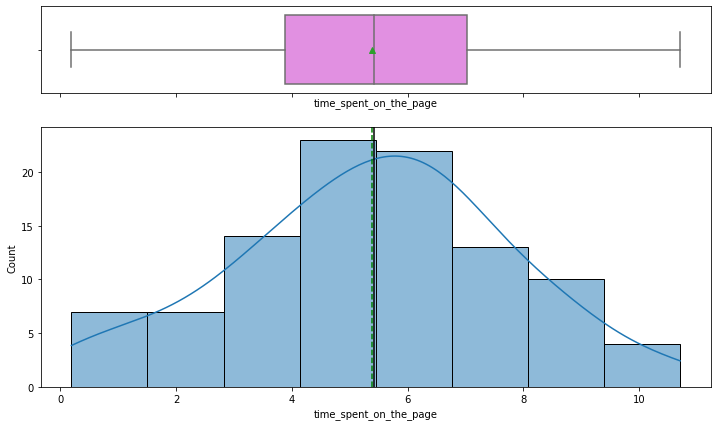

In [15]:
histogram_boxplot(df, 'time_spent_on_the_page')

I added in the KDE on this chart to show that while this is definitely not a perfect normal distribution, the shape of the KDE curve is starting to resemble a normal bell curve distribution. There are no outliers in this data frame given that 1.5xIQR is about 4.7 and no observations lie outside Q1-4.7 or Q3+4.7. Finally, there is no meaningful skew to this distribution based on the mean and median being very close.

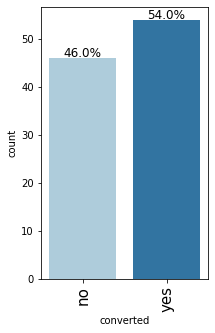

In [16]:
labeled_barplot(df,'converted',perc = True)

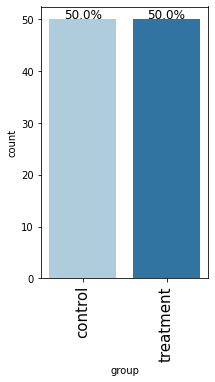

In [17]:
labeled_barplot(df,'group',perc = True)

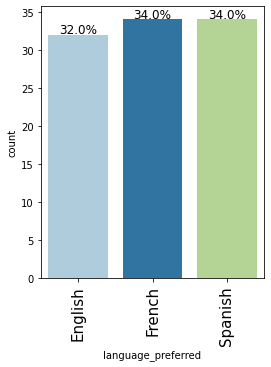

In [18]:
labeled_barplot(df,'language_preferred',perc = True)

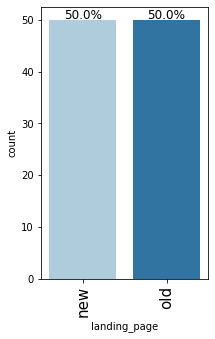

In [19]:
labeled_barplot(df,'landing_page',perc = True)

### Bivariate Analysis

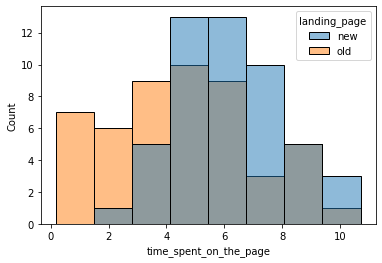

In [20]:
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'landing_page')
plt.show()

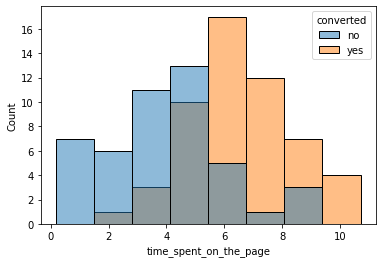

In [21]:
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'converted')
plt.show()

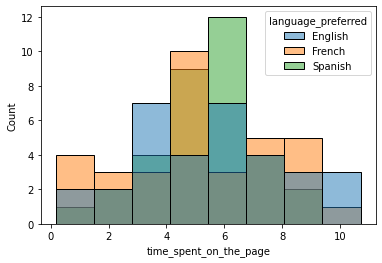

In [22]:
sns.histplot(data = df, x = 'time_spent_on_the_page', hue = 'language_preferred')
plt.show()

Just from an initial view, these graphs would seem to suggest that users on the new landing page spend more time on the page than those on the old landing page, and those that convert spend more time than those that don't. The language graph is much more difficult to gain insight from just through visual analysis.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

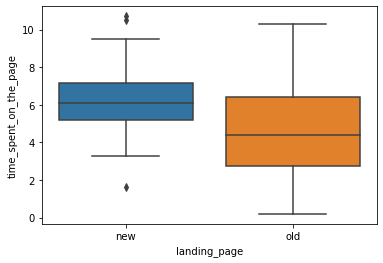

In [23]:
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

H0: Users on the new landing page spend the same amount of time on the page as users on the old landing page.
H0: Time_spent_new = Time_spent_old
HA: Users on the new landing page spend more time on the page as users on the old landing page.
HA: Time_spent_new > Time_spent_old

### Step 2: Select Appropriate test

This is a one tailed test that's comparing the means of two independent populations. Although we had the overall standard deviation of the dataframe, we don't know the standard deviation of the two populations.

Based on this, we'll want to use a 2-sample independent t-test.

### Step 3: Decide the significance level

I'm going to use a 95% significance level for this test, so alpha will be equal to .05

### Step 4: Collect and prepare data

In [24]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

# creating variables for time spent on the new page and time spent on the old page

In [25]:
import scipy.stats as stats

In [26]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


Based on the above, we can't assume that the standard devs. of the two populations are equal.

### Step 5: Calculate the p-value

In [27]:
stats.ttest_ind(time_spent_new, time_spent_old, axis=0, equal_var=False, alternative='greater')

Ttest_indResult(statistic=3.7867702694199856, pvalue=0.0001392381225166549)

### Step 6: Compare the p-value with $\alpha$

The p-value of .00014 is much lower than our alpha value of .05. 

### Step 7:  Draw inference

Because of this, we have enough evidence to reject the null hypothesis and accept the alternative, that the mean of time spent on the new landing page is greater than the mean of time spent on the old page.

**A similar approach can be followed to answer the other questions.**

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

H0: Users on the new landing page convert at the same rate as users on the old landing page.
H0: Conversion_rate_new = Conversion_rate_old
HA: Users on the new landing page convert at a higher rate than users on the old landing page.
HA: Conversion_rate_new > Conversion_rate_old

Since we're comparing conversion rates of two populations (proportion of converted users out of all users), we'll use a two-proportion Z-Test.

Again, we'll use a 95% significance level so alpha will be .05.

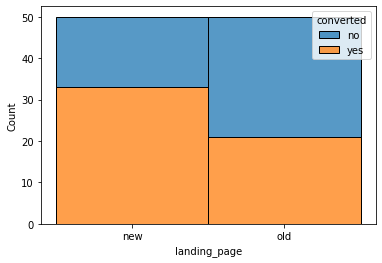

In [28]:
sns.histplot(data = df, x = 'landing_page', hue = 'converted', multiple = 'stack')
plt.show()

In [29]:
converted_new = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
converted_old = df[df['group'] == 'control']['converted'].value_counts()['yes']

count_treatment = df.group.value_counts()['treatment']
count_control = df.group.value_counts()['control']

# creating variables to filter the dataframe to those that converted, and group between treatment and control groups

In [30]:
print (converted_new, converted_old)
print (count_treatment, count_control)

33 21
50 50


In [31]:
from statsmodels.stats.proportion import proportions_ztest

In [32]:
converted_count = np.array([33, 21])
total_count = np.array([50, 50])

# created arrays for counts of conversion and total counts on treatment and control groups

In [33]:
test_stat, p_value = proportions_ztest(converted_count, total_count)
print('test stat is', test_stat)
print('p_value is', p_value)

test stat is 2.4077170617153842
p_value is 0.016052616408112556


Based on the p_value of .016 being less than our alpha of .05, we have sufficient evidence to reject the null hypothesis and say that the conversion rate of the new landing page is greater than the conversion rate of the old landing page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

H0: Conversion rate and preferred language are independent of each other.
HA: Conversion rate and preferred language are not independent of each other.

Because we're exploring independence between two variables, we'll use a chi-square test of independence.

The significance level will be 95%, so our alpha value is .05.

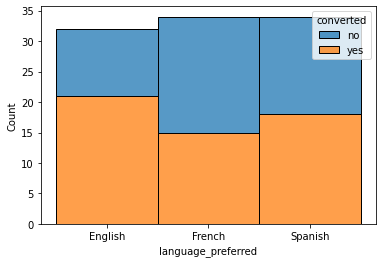

In [34]:
sns.histplot(data = df, x = 'language_preferred', hue = 'converted', multiple = 'stack')
plt.show()

In [35]:
converted_english = df[df['language_preferred'] == 'English']['converted'].value_counts()['yes']
converted_french = df[df['language_preferred'] == 'French']['converted'].value_counts()['yes']
converted_spanish = df[df['language_preferred'] == 'Spanish']['converted'].value_counts()['yes']

count_english = df.language_preferred.value_counts()['English']
count_spanish = df.language_preferred.value_counts()['Spanish']
count_french = df.language_preferred.value_counts()['French']

# creating variables for the counts of total users and those that converted within each language

In [36]:
obs = np.array([[converted_english, converted_french, converted_spanish], [count_english, count_french, count_spanish]])

# creating an array with the number of conversions and total count within each language

In [37]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(obs)

print(p_value)

0.6329258325119037


The p_value we get from this test is .633, which is much larger than our alpha value of .05. Therefore, we don't have enough evidence to reject the null hypothesis and must say that preferred language and conversion rate are independent of each other.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

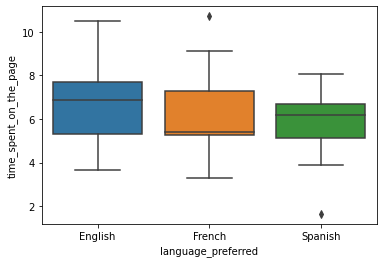

In [38]:
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', data = df[df['landing_page'] == 'new'])
plt.show()

H0: The average time spent on the new page is the same for all preferred languages
H0: Time_spent_new_English = time_spent_new_spanish = time_spent_new_french
HA: At least one of the languages has a different average time spent on the new page than another.

Since we're comparing equality of means between three different populations, we'll use the ANOVA test of variance

We'll use a significance level of 95%, so our alpha value will be .05

First, we need to run the Shapiro-Wilkes test to test the following hypotheses:

H0: Time spent on the new page follows a normal distribution

HA: Time spent on the new page does not follow a normal distribution

In [39]:
df_new = df[df['landing_page'] == 'new']

# creating a new data frame to filter the initial df to only the users who received the new landing page experience

In [40]:
from scipy.stats import shapiro

w, p_value = shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


The p_value of .80 is much higher than our alpha value of .05, so we don't have enough evidence to reject the null hypothesis and can move forward with the assumption that time spent on page follows a normal distribution.

Next, we need to run a Levene test to confirm our assumption that the population variances are equal.

H0: All of the population variances are equal
HA: At least one of the population variances is not equal.

In [41]:
from scipy.stats import levene
statistic, p_value = levene( df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'])

print('The p-value is', p_value)

The p-value is 0.46711357711340173


Because the p_value is larger than our alpha value of .05, we fail to reject the null hypothesis and can move forward with our assumption of equality of variances between populations.

In [42]:
time_spent_english = df_new[df_new['language_preferred'] == 'English']['time_spent_on_the_page']
time_spent_french = df_new[df_new['language_preferred'] == 'French']['time_spent_on_the_page']
time_spent_spanish = df_new[df_new['language_preferred'] == 'Spanish']['time_spent_on_the_page']

# creating new variables to calculate time spent on the new landing page by language

In [43]:
from scipy.stats import f_oneway

test_stat, p_value = stats.f_oneway(time_spent_english, time_spent_spanish, time_spent_french)
                              
print(p_value)

0.43204138694325955


The p_value of .43 is higher than our alpha level of .05, so we don't have enough evidence to reject the null hypothesis and must accept that the average time spent on the new page is equal for all languages.

## Conclusion and Business Recommendations

Based on our hypothesis testing, there are a few conclusions we are able to draw from the data:

First, we can see that the mean time spent on the new landing page is greater than that of the old landing page.

Second, we accept that the conversion rate on the new landing page is greater than that of the old landing page.

Third, we see that conversion rate and preferred language are independent of each other.

Finally, we showed that the average time spent on the new page is equal for all languages.

Taking all of these learnings together, we can put forward a few business recommendations to drive more subscribers for the news portal. 

First, because our testing showed that time on page and conversion rate both increased with the new landing page, we should roll out this landing page to all of our users and use this as our control page going forward. This will increase engagement with the site and will drive more subscriptions than we would have received with the old landing page.

Secondly, our testing showed that the user's preferred language is independent of conversion rate, and all user languages have equal time spent on the page. Because there isn't a meaningful difference in user behavior across different languages, we should focus improvements across all languages we use instead of spending time, money and resources for specific testing within each language. We'll want to revisit this in the future as we roll out additional changes, but for now we can be confident that we can make a significant business impact across all of our user languages with this new page.